In [1]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn 

from scipy import stats
from scipy.stats import norm, skew 

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))

# 1. Data Load

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,...,4,5,4,4,4,5,4,0,0.000,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,...,5,5,4,2,1,5,2,18,18.000,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,...,4,4,4,4,5,4,3,0,0.000,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,...,3,2,4,5,3,4,3,10,2.000,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,...,4,4,4,4,4,4,5,0,0.000,1


- id : 샘플 아이디
- Gender : 성별
- Customer Type : Disloyal 또는 Loyal 고객
- Age : 나이
- Type of Travel : Business 또는 Personal Travel
- Class : 등급
- Flight Distance : 비행 거리
- Seat comfort : 좌석 만족도
- Departure/Arrival time convenient : 출발/도착 시간 편의성 만족도
- Food and drink : 식음료 만족도
- Gate location : 게이트 위치 만족도
- Inflight wifi service : 기내 와이파이 서비스 만족도
- Inflight entertainment : 기내 엔터테인먼트 만족도
- Online support : 온라인 지원 만족도
- Ease of Online booking : 온라인 예매 편리성 만족도
- On-board service : 탑승 서비스 만족도
- Leg room service : Leg room 서비스 만족도
- Baggage handling : 수하물 처리 만족도
- Checkin service : 체크인 서비스 만족도
- Cleanliness : 청결도 만족도
- Online boarding : 온라인보딩 만족도
- Departure Delay in Minutes : 출발 지연 시간
- Arrival Delay in Minutes : 도착 지연 시간
- target : 만족 여부

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 3000 non-null   int64  
 1   Gender                             3000 non-null   object 
 2   Customer Type                      3000 non-null   object 
 3   Age                                3000 non-null   int64  
 4   Type of Travel                     3000 non-null   object 
 5   Class                              3000 non-null   object 
 6   Flight Distance                    3000 non-null   int64  
 7   Seat comfort                       3000 non-null   int64  
 8   Departure/Arrival time convenient  3000 non-null   int64  
 9   Food and drink                     3000 non-null   int64  
 10  Gate location                      3000 non-null   int64  
 11  Inflight wifi service              3000 non-null   int64

In [5]:
numeric_col = [col for col in train if train[col].dtype != "object" ]
object_col = [col for col in train if train[col].dtype == "object" ]

In [6]:
len(numeric_col)

20

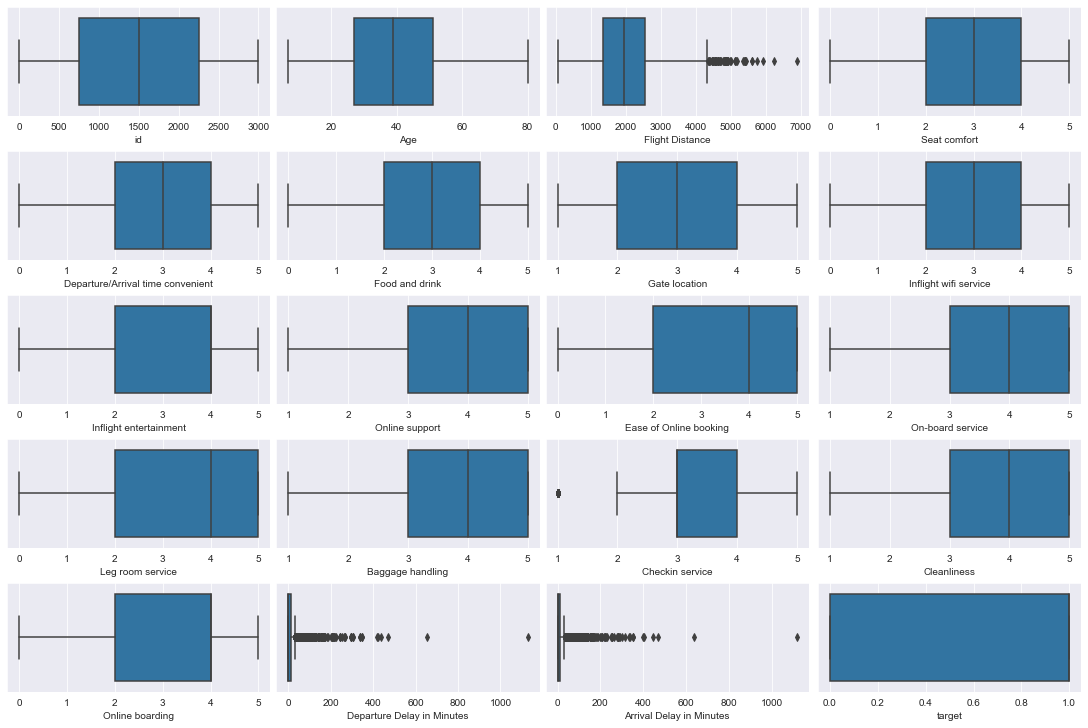

In [7]:
plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(len(numeric_col)):
    plt.subplot( 5, 4, i+1 )
    sns.boxplot( train[numeric_col[i]] )

만족도에 관련된 컬럼은 hist로 다시 시각화

In [8]:
rank_col = [
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding'
 ]

In [9]:
len(rank_col)

14

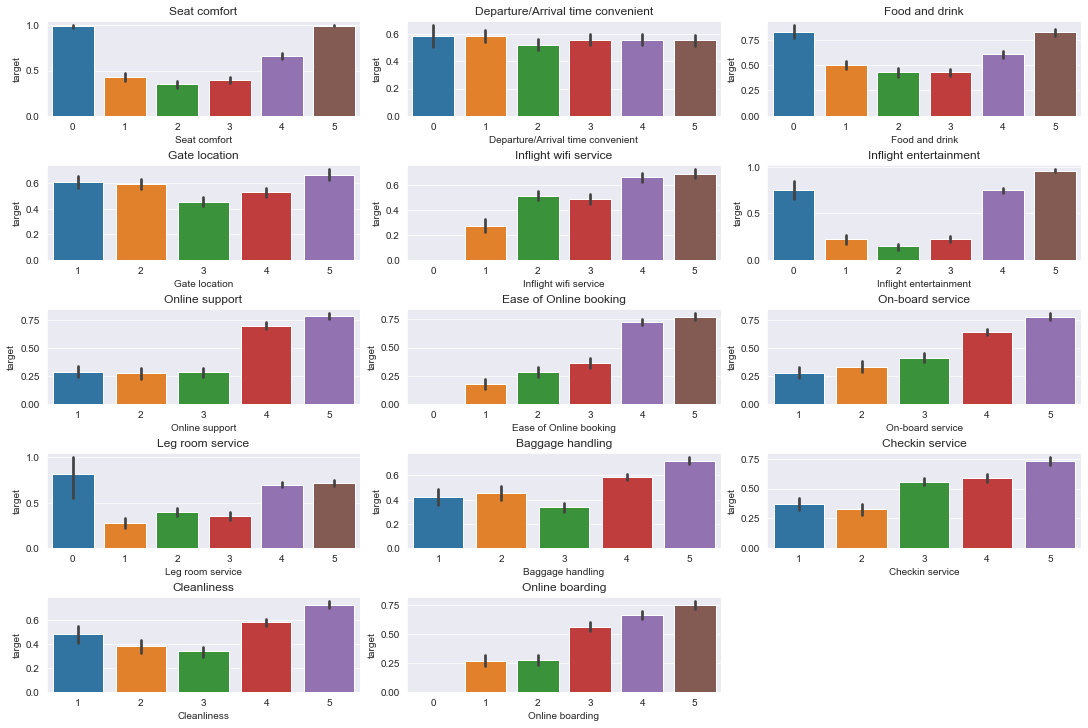

In [10]:
plt.figure( figsize=(15,10),
            constrained_layout = True )

for i in range(len(rank_col)):
    plt.subplot( 5, 3, i+1 )
    sns.barplot(x = rank_col[i], y = 'target', data = train)
    plt.title(rank_col[i])

0~5점 척도로 진행을 하기로는 0점의 target value가 1에 가까운 경우가 많은 것을 확인할 수 있다.

Flight Distance, Departure Delay in Minutes, Arrival Delay in Minutes 에는 많은 이상치가 보였기에 이에 대한 확인을 진행

In [11]:
col = ['Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

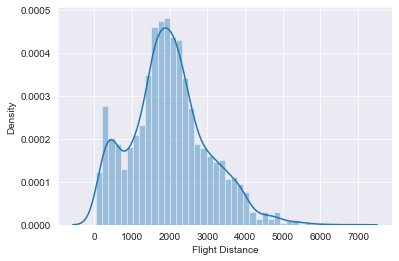

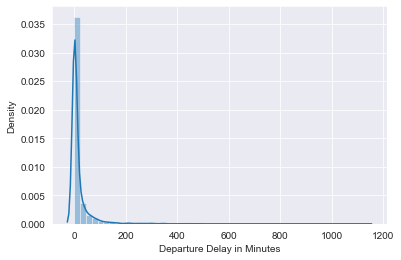

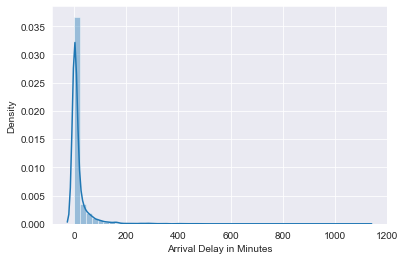

In [12]:
for i in col:
  sns.distplot(train[i])
  plt.show()

In [13]:
bad_time = train[train['Departure/Arrival time convenient'] <= 3]

In [14]:
print(len(bad_time) / 3000)

0.5673333333333334


In [15]:
train_out = train[col]
train_out.describe(percentiles = [.25, .44, .5, .75, .99])

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,3000.000,3000.000,3000.000
mean,1983.079,15.634,15.922
std,1028.109,45.083,45.203
min,52.000,0.000,0.000
25%,1348.250,0.000,0.000
44%,1794.560,0.000,0.000
50%,1937.000,0.000,0.000
75%,2547.250,12.000,13.000
99%,4800.060,206.010,203.040
max,6882.000,1128.000,1115.000


Departure/Arrival time convenient에 대해 만족하지 못한 사람(0~3점)의 비율이 56%이다. 이 변수와 delay 시간과의 연관성을 살펴보았는데, delay시간이 없는 경우에도 불만족한 고객이 있는 것을 확인할 수 있다.

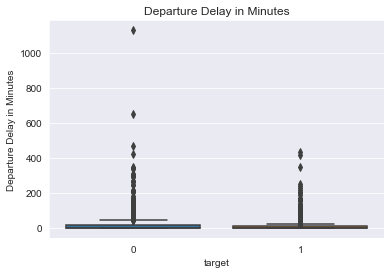

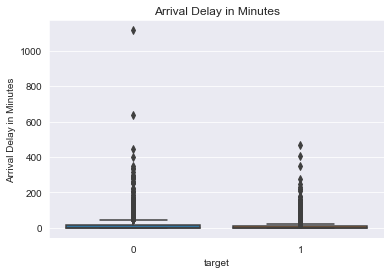

In [16]:
for i in ['Departure Delay in Minutes', 'Arrival Delay in Minutes']:
  sns.boxplot(train['target'], train[i])
  plt.title(i)
  plt.show()

또한, delay 시간에 대한 큰 이상치들은 모두 불만족으로 분류되어있어 연관성이 있을 것이라 판단하여 제거하지 않는다.

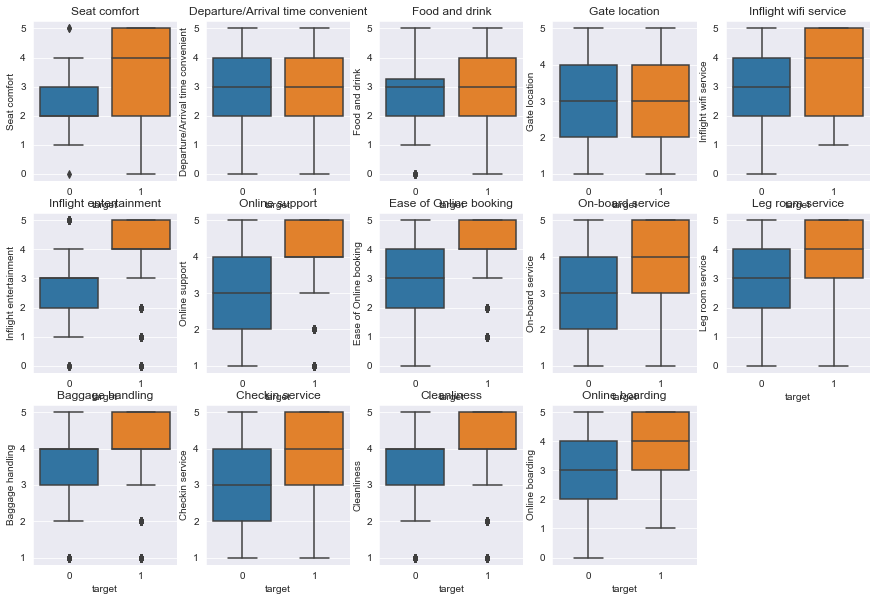

In [17]:
plt.figure(figsize=(15, 10))
for idx, i in enumerate(rank_col):
  plt.subplot(3, 5, idx+1)
  sns.boxplot(train['target'], train[i])
  plt.title(i)

In [18]:
len(object_col)

4

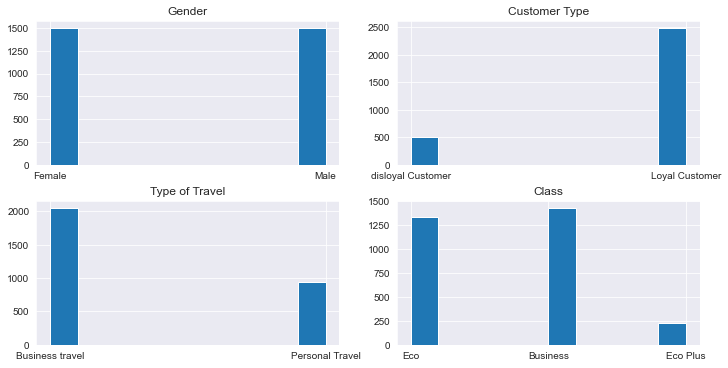

In [19]:
plt.figure( figsize=(10,5),
            constrained_layout = True )

for i in range(len(object_col)):
    plt.subplot( 2, 2, i+1 )
    plt.hist( train[object_col[i]] )
    plt.title(object_col[i])

위 변수들은 labelencoding 작업을 통해 numerical 변수로 변환!

# 2. Feature Engineering

In [20]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.target.values
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data.drop(['target'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (5000, 23)


<AxesSubplot:>

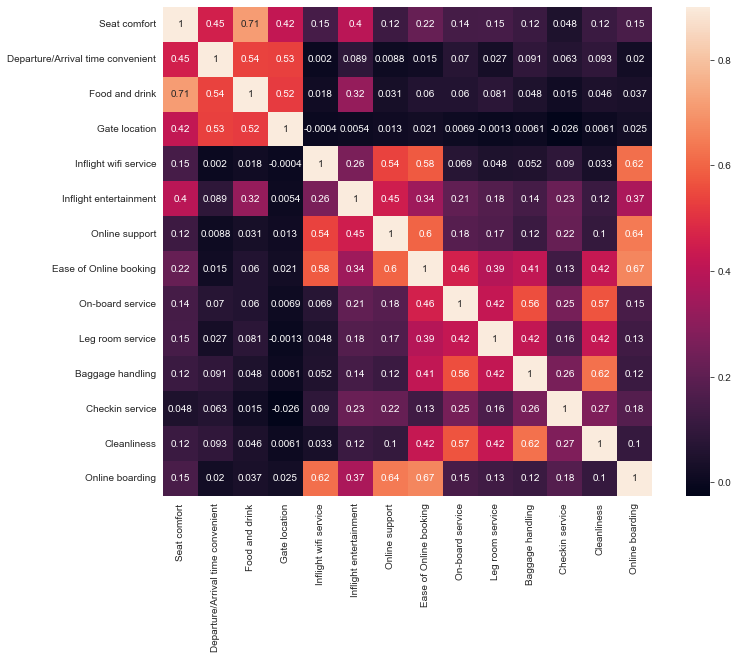

In [21]:
corrmat = all_data[rank_col].corr(method = 'spearman')
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True, annot = True)

전체 데이터에 대해서 correlation을 확인한 결과, 만족도 변수간의 큰 상관관계를 가지지는 않는것을 확인할 수 있다.

In [22]:
zero_sc = []

In [23]:
for i in rank_col:
    if len(all_data[all_data[i] == 0]) > 0:
        zero_sc.append(i)
        print(i,len(all_data[all_data[i] == 0])) 

Seat comfort 170
Departure/Arrival time convenient 244
Food and drink 209
Inflight wifi service 3
Inflight entertainment 112
Ease of Online booking 1
Leg room service 21
Online boarding 1


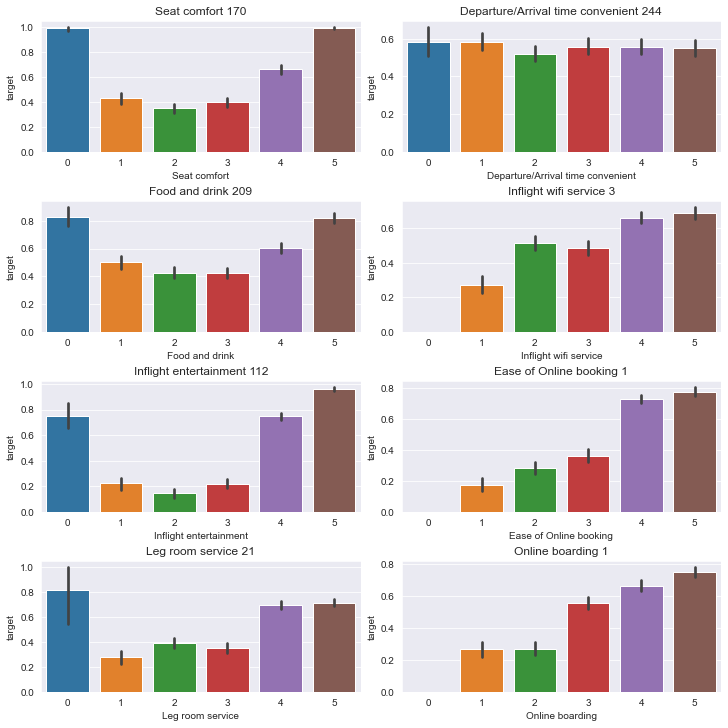

In [24]:
plt.figure( figsize=(10,10),
            constrained_layout = True )

for i in range(len(zero_sc)):
    plt.subplot( 4, 2, i+1 )
    sns.barplot(x = zero_sc[i], y = 'target', data = train)
    plt.title(zero_sc[i]+' '+str(len(all_data[all_data[zero_sc[i]] == 0])))

- 학습 데이터와 검증 데이터를 합쳐서 전처리를 진행하고 있기 때문에 test데이터의 손실을 막기 위해 0인 결측치를 제거하지 않고 대치로 진행
- 1\~3점이 비슷한 target value를 가지는 경우가 많고, 4~5점이 비슷한 target value를 가진다. 

갯수가 적고 target value가 0의 값을 가지는 3개의 변수는 1.5점으로 대치해준다. 

갯수가 20개 이상이고, 0.5도 넘는 값을 가지는 변수들은 각 변수와 상관관계가 가장 높은 변수의 값으로 대체해준다.

In [25]:
zero_sc

['Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Inflight wifi service',
 'Inflight entertainment',
 'Ease of Online booking',
 'Leg room service',
 'Online boarding']

In [26]:
tar_ze = ['Inflight wifi service','Ease of Online booking','Online boarding']

In [27]:
tar_on = [i for i in zero_sc if i not in tar_ze]

In [28]:
tar_on

['Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Inflight entertainment',
 'Leg room service']

### 1. 0에대한 처리

In [29]:
all_cor = all_data[rank_col].corr()

In [30]:
for i in tar_ze:
    for idx in all_data[all_data[i] == 0].index:
        all_data[i][idx] = 1.5

In [31]:
for i in tar_on:
    cor_idxs = all_cor[i].sort_values(ascending = False).index
    idxs = True
    while idxs:
        for k in cor_idxs:
            if k not in tar_on:
                cor_idx = k
                idxs = False
    print(cor_idx)
    for idx in all_data[all_data[i] == 0].index:
        all_data[i][idx] = all_data[cor_idx][idx]

Checkin service
Inflight wifi service
Checkin service
Gate location
Gate location


In [32]:
for i in rank_col:
    if len(all_data[all_data[i] == 0]) > 0:
        print(i,len(all_data[all_data[i] == 0])) 

### 2. Log Transform

In [33]:
skewed_feats = all_data[col].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Departure Delay in Minutes,8.982
Arrival Delay in Minutes,8.586
Flight Distance,0.457


delay minute 변수의 왜도가 상당히 심하기 때문에 log 변환 진행

In [34]:
for i in ['Departure Delay in Minutes','Arrival Delay in Minutes']:
  all_data[i] = np.log1p(all_data[i])

In [35]:
skewed_feats = all_data[col].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Departure Delay in Minutes,0.942
Arrival Delay in Minutes,0.895
Flight Distance,0.457


위 3개의 변수는 값의 범위가 다른 변수들과 잘 맞지 않기 때문에 이를 Scaling

In [36]:
sc_data = all_data[col]

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
mms = MinMaxScaler()
mms.fit(sc_data)
sc_data = mms.transform(sc_data)

In [39]:
sc_df = pd.DataFrame(sc_data, columns=col)

In [40]:
sc_df

,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,0.227,0.000,0.000
1,0.404,0.419,0.420
2,0.376,0.000,0.000
3,0.336,0.341,0.157
4,0.008,0.000,0.000
...,...,...,...
4995,0.001,0.000,0.000
4996,0.276,0.649,0.656
4997,0.344,0.000,0.198
4998,0.052,0.637,0.631


In [41]:
for coln in sc_df.columns:
    all_data[coln] = sc_df[coln]

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
std = StandardScaler()
std.fit(sc_data)
sc_data = std.transform(sc_data)

In [39]:
sc_df = pd.DataFrame(sc_data, columns=col)

In [40]:
for coln in sc_df.columns:
    all_data[coln] = sc_df[coln]

## 3. OneHotEncoding

In [41]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 5000 non-null   int64  
 1   Gender                             5000 non-null   object 
 2   Customer Type                      5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Type of Travel                     5000 non-null   object 
 5   Class                              5000 non-null   object 
 6   Flight Distance                    5000 non-null   float64
 7   Seat comfort                       5000 non-null   int64  
 8   Departure/Arrival time convenient  5000 non-null   int64  
 9   Food and drink                     5000 non-null   int64  
 10  Gate location                      5000 non-null   int64  
 11  Inflight wifi service              5000 non-null   int64

### Numerical Feature to Category Feature

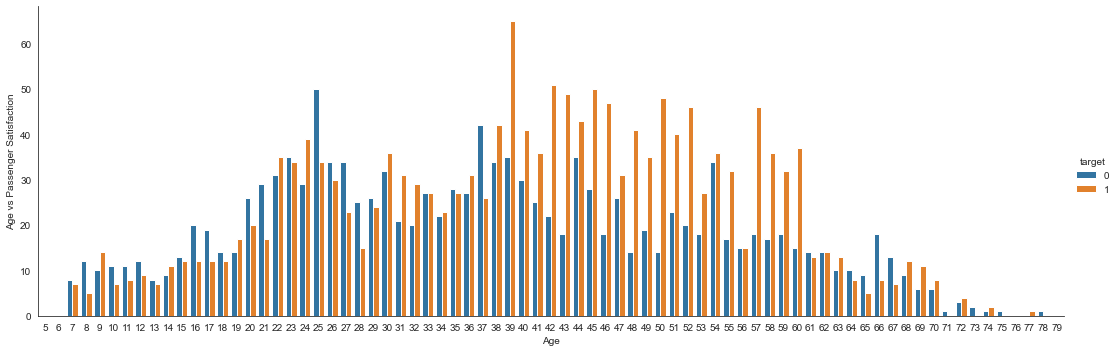

In [44]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='target', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

In [45]:
for l in range(len(all_data)): 
  all_data['Age'][l] = str(all_data['Age'][l] // 10)

In [46]:
all_data['Age'] = all_data['Age'].astype('str')

In [42]:
[col for col in all_data if all_data[col].dtype == "object" ]

['Gender', 'Customer Type', 'Type of Travel', 'Class']

In [43]:
all_data= pd.get_dummies(all_data)

In [44]:
all_data

,id,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,1,22,-0.373,3,4,3,3,4,3,4,...,-0.772,1,0,0,1,1,0,0,1,0
1,2,37,0.796,2,4,4,4,1,4,3,...,1.054,1,0,1,0,1,0,1,0,0
2,3,46,0.615,1,1,1,1,4,5,5,...,-0.772,0,1,1,0,1,0,1,0,0
3,4,24,0.350,3,3,3,3,3,3,3,...,-0.090,1,0,0,1,1,0,0,1,0
4,5,58,-1.816,3,3,3,3,4,4,5,...,-0.772,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,1996,62,-1.865,3,1,1,1,4,3,4,...,-0.772,1,0,1,0,1,0,0,0,1
4996,1997,33,-0.047,4,4,4,4,3,5,5,...,2.084,1,0,1,0,1,0,1,0,0
4997,1998,29,0.398,3,5,4,4,3,3,3,...,0.088,0,1,1,0,1,0,0,1,0
4998,1999,51,-1.525,5,2,5,4,4,3,3,...,1.976,1,0,1,0,0,1,1,0,0


## 5. Train test Split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
all_data.drop('id', axis = 1, inplace = True)

In [47]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [48]:
train, val, y_train, y_val = train_test_split(train, y_train, test_size = 0.2, shuffle=True , stratify=y_train)

# Modeling

In [49]:
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb
import lightgbm as lgb
import catboost as cat

In [50]:
def accuracy(true, pred):   
    score = np.mean(true==pred)
    return score

In [51]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [52]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [53]:
RF = RandomForestClassifier()

In [54]:
GBoost = GradientBoostingClassifier()

In [55]:
model_xgb = xgb.XGBClassifier()

In [56]:
model_lgb = lgb.LGBMClassifier()

In [57]:
model_cat = cat.CatBoostClassifier()

In [58]:
n_folds = 10

In [59]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=10):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [60]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = RF)

In [61]:
stacked_averaged_models.fit(train.values, y_train)

StackingAveragedModels(base_models=(Pipeline(steps=[('robustscaler',
                                                     RobustScaler()),
                                                    ('elasticnet',
                                                     ElasticNet(alpha=0.0005,
                                                                l1_ratio=0.9,
                                                                random_state=3))]),
                                    GradientBoostingClassifier(),
                                    KernelRidge(alpha=0.6, coef0=2.5, degree=2,
                                                kernel='polynomial')),
                       meta_model=RandomForestClassifier())

In [62]:
st_train_pred = stacked_averaged_models.predict(val)
print(accuracy(y_val, st_train_pred))

0.8833333333333333


In [63]:
model_xgb.fit(train, y_train)

XGBClassifier()

In [64]:
xgb_train_pred = model_xgb.predict(val)
print(accuracy(y_val, xgb_train_pred))

0.8983333333333333


In [65]:
model_lgb.fit(train, y_train)

LGBMClassifier()

In [66]:
lgb_train_pred = model_lgb.predict(val)
print(accuracy(y_val, lgb_train_pred))

0.9233333333333333


In [67]:
model_cat.fit(train, y_train)

Learning rate set to 0.014972
0:	learn: 0.6787417	total: 154ms	remaining: 2m 34s
1:	learn: 0.6645924	total: 158ms	remaining: 1m 18s
2:	learn: 0.6478104	total: 161ms	remaining: 53.6s
3:	learn: 0.6350451	total: 165ms	remaining: 41s
4:	learn: 0.6233278	total: 168ms	remaining: 33.5s
5:	learn: 0.6109730	total: 172ms	remaining: 28.5s
6:	learn: 0.6002633	total: 176ms	remaining: 25s
7:	learn: 0.5884333	total: 180ms	remaining: 22.3s
8:	learn: 0.5774863	total: 184ms	remaining: 20.2s
9:	learn: 0.5691253	total: 187ms	remaining: 18.5s
10:	learn: 0.5603413	total: 191ms	remaining: 17.1s
11:	learn: 0.5510406	total: 194ms	remaining: 16s
12:	learn: 0.5413075	total: 198ms	remaining: 15s
13:	learn: 0.5325123	total: 201ms	remaining: 14.2s
14:	learn: 0.5231900	total: 205ms	remaining: 13.5s
15:	learn: 0.5153792	total: 209ms	remaining: 12.8s
16:	learn: 0.5088373	total: 212ms	remaining: 12.3s
17:	learn: 0.5018356	total: 216ms	remaining: 11.8s
18:	learn: 0.4942527	total: 220ms	remaining: 11.3s
19:	learn: 0.4860

In [68]:
cat_train_pred = model_cat.predict(val)
print(accuracy(y_val, cat_train_pred))

0.9283333333333333


In [69]:
st_test_pred = stacked_averaged_models.predict(test)
xgb_test_pred = model_xgb.predict(test)
lgb_test_pred = model_lgb.predict(test)
cat_test_pred = model_cat.predict(test)

In [197]:
ensemble = st_test_pred*0.2 + xgb_test_pred*0.1 + lgb_test_pred*0.2 + cat_test_pred * 0.5

In [198]:
for i in range(len(ensemble)):
  ensemble[i] = 0 if ensemble[i] < 0.5 else 1

In [199]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = ensemble
sub.to_csv('stack_submission.csv', index=False)

In [70]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = cat_test_pred
sub.to_csv('cat_submission.csv', index=False)

In [ ]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = lgb_test_pred
sub.to_csv('lgb_submission.csv', index=False)

In [95]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = xgb_test_pred
sub.to_csv('xgb_submission.csv', index=False)

In [ ]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = st_test_pred
sub.to_csv('st_submission.csv', index=False)

### Random Search

In [218]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt 

In [228]:
parameters = {'depth'         : sp_randInt(4, 100),
                  'learning_rate' : sp_randFloat(),
                  'iterations'    : sp_randInt(10, 1000)
                 }

In [229]:
model_cat = cat.CatBoostClassifier()

In [230]:
randm = RandomizedSearchCV(estimator=model_cat, param_distributions = parameters, 
                           cv = 5, n_iter = 10, n_jobs=-1)

In [231]:
randm.fit(train, y_train)

0:	learn: 0.6654316	total: 2.7ms	remaining: 837ms
1:	learn: 0.6322824	total: 5.58ms	remaining: 862ms
2:	learn: 0.6078552	total: 8.23ms	remaining: 845ms
3:	learn: 0.5813999	total: 11ms	remaining: 846ms
4:	learn: 0.5594366	total: 13.5ms	remaining: 824ms
5:	learn: 0.5406999	total: 16ms	remaining: 813ms
6:	learn: 0.5209085	total: 18.6ms	remaining: 806ms
7:	learn: 0.5058380	total: 21.3ms	remaining: 806ms
8:	learn: 0.4938287	total: 24ms	remaining: 805ms
9:	learn: 0.4822673	total: 26.6ms	remaining: 799ms
10:	learn: 0.4695436	total: 29.1ms	remaining: 794ms
11:	learn: 0.4563244	total: 31.7ms	remaining: 790ms
12:	learn: 0.4473671	total: 34.3ms	remaining: 787ms
13:	learn: 0.4370757	total: 37.1ms	remaining: 788ms
14:	learn: 0.4284209	total: 39.7ms	remaining: 783ms
15:	learn: 0.4196122	total: 42.4ms	remaining: 782ms
16:	learn: 0.4137155	total: 45.1ms	remaining: 780ms
17:	learn: 0.4053230	total: 47.6ms	remaining: 775ms
18:	learn: 0.3945134	total: 50.4ms	remaining: 774ms
19:	learn: 0.3875665	total: 5

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002433E467E88>,
                   n_jobs=-1,
                   param_distributions={'depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002433ECCF288>,
                                        'iterations': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002430E884F88>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002433C88FE88>})

In [233]:
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    

print("\n The best estimator across ALL searched params:\n",
      randm.best_estimator_)

print("\n The best score across ALL searched params:\n",
      randm.best_score_)

print("\n The best parameters across ALL searched params:\n",
      randm.best_params_)

print("\n ========================================================")


 Results from Random Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.9029166666666667

 The best parameters across ALL searched params:
 {'depth': 4, 'iterations': 311, 'learning_rate': 0.03939845207561543}



In [232]:
cat_train_pred_rd = randm.best_estimator_.predict(val)
print(accuracy(y_val, cat_train_pred_rd))

0.935


In [234]:
cat_test_pred_rd = randm.best_estimator_.predict(test)

In [235]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = cat_test_pred_rd
sub.to_csv('cat_rs_submission.csv', index=False)

In [73]:
model_cat.feature_names_

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes',
 'Gender_Female',
 'Gender_Male',
 'Customer Type_Loyal Customer',
 'Customer Type_disloyal Customer',
 'Type of Travel_Business travel',
 'Type of Travel_Personal Travel',
 'Class_Business',
 'Class_Eco',
 'Class_Eco Plus']

In [74]:
model_cat.feature_importances_

array([ 3.75440621,  2.80991963, 15.50975341,  4.15205896,  2.37398893,
        3.2399339 ,  1.33481735, 12.80012476,  2.84619733,  4.14430859,
        4.2053974 ,  3.50492804,  4.7842886 ,  3.72590261,  2.4413318 ,
        2.79803247,  1.24152473,  2.44875315,  2.95160788,  2.5061146 ,
        3.27209079,  3.20370565,  3.5647867 ,  4.21607367,  1.43767678,
        0.44021029,  0.29206578])

In [75]:
cat_df = pd.DataFrame({
    'name' : model_cat.feature_names_,
    'importance' : model_cat.feature_importances_
})

In [80]:
cat_df = cat_df.sort_values(by = 'importance', ascending = False)

In [92]:
cat_df

,name,importance
2,Seat comfort,15.510
7,Inflight entertainment,12.800
12,Baggage handling,4.784
23,Type of Travel_Personal Travel,4.216
10,On-board service,4.205
3,Departure/Arrival time convenient,4.152
9,Ease of Online booking,4.144
0,Age,3.754
13,Checkin service,3.726
22,Type of Travel_Business travel,3.565


In [84]:
cat_col = list(cat_df[cat_df['importance'] > 3]['name'])

In [85]:
train = train[cat_col]
test = test[cat_col]

In [86]:
model_cat = cat.CatBoostClassifier()

In [89]:
model_cat.fit(train, y_train)

Learning rate set to 0.014972
0:	learn: 0.6769988	total: 2.76ms	remaining: 2.76s
1:	learn: 0.6634926	total: 5.52ms	remaining: 2.75s
2:	learn: 0.6494393	total: 8.53ms	remaining: 2.83s
3:	learn: 0.6371858	total: 11.4ms	remaining: 2.83s
4:	learn: 0.6241585	total: 14ms	remaining: 2.78s
5:	learn: 0.6125316	total: 16.5ms	remaining: 2.73s
6:	learn: 0.6000874	total: 19.3ms	remaining: 2.73s
7:	learn: 0.5888303	total: 22.5ms	remaining: 2.79s
8:	learn: 0.5772153	total: 25.4ms	remaining: 2.79s
9:	learn: 0.5650829	total: 28.5ms	remaining: 2.82s
10:	learn: 0.5547627	total: 31.7ms	remaining: 2.85s
11:	learn: 0.5465302	total: 33.7ms	remaining: 2.77s
12:	learn: 0.5382926	total: 36.7ms	remaining: 2.79s
13:	learn: 0.5296715	total: 39.4ms	remaining: 2.77s
14:	learn: 0.5204515	total: 42.2ms	remaining: 2.77s
15:	learn: 0.5109330	total: 45.1ms	remaining: 2.77s
16:	learn: 0.5023254	total: 48.3ms	remaining: 2.79s
17:	learn: 0.4950789	total: 50.9ms	remaining: 2.78s
18:	learn: 0.4867169	total: 53.8ms	remaining: 

In [90]:
cat_test_pred = model_cat.predict(test)

In [91]:
sub = pd.read_csv('data/sample_submission.csv')
sub['target'] = cat_test_pred
sub.to_csv('cat_submission.csv', index=False)